In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load your dataset
df = pd.read_csv(r"C:\Users\conne\OneDrive\Desktop\Project 4\Project4-MachineLearning\df_joined_data.csv")

# Convert 'Sale Date' to datetime and extract the year
df['Sale Date'] = pd.to_datetime(df['Sale Date']).dt.year

# Prepare features and target
X = df[['latitude', 'longitude', 'Sale Date', 'Sale Price']]  # Ensure the correct columns are used
y = df['Sale Price']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the numeric transformer with an imputer and scaler
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute with the median value of each column
    ('scaler', StandardScaler())])

# Combine transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ['latitude', 'longitude', 'Sale Date', 'Sale Price'])])

# Create a full pipeline with preprocessor and estimator
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestRegressor(n_estimators=100, random_state=42))])

# Train the model
clf.fit(X_train, y_train)

# Evaluate the model
predictions = clf.predict(X_test)
rmse = mean_squared_error(y_test, predictions, squared=False)
mae = mean_absolute_error(y_test, predictions)

print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")

C:\Users\conne\AppData\Local\Temp\ipykernel_3608\3626106240.py:11: DtypeWarning: Columns (79) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"C:\Users\conne\OneDrive\Desktop\Project 4\Project4-MachineLearning\df_joined_data.csv")


Root Mean Squared Error: 16144.895873308247
Mean Absolute Error: 141.50259574868767


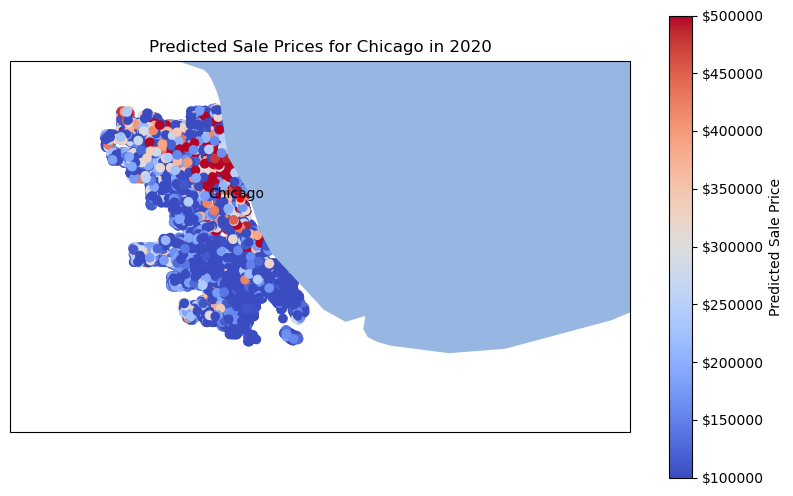

In [18]:
# Assuming clf is your trained model
# Predicting using the test dataset or any new dataset
predicted_prices = clf.predict(X_test)  # or any new data for prediction

# Adding predictions to the test dataset or creating a new DataFrame for visualization
X_test['Predicted Sale Price'] = predicted_prices

# Now use this updated DataFrame for your visualization
# Here's a revised version of your matplotlib code:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.ticker import FormatStrFormatter
from shapely.geometry import Point

fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([-88, -87, 41.5, 42.1])  # Focus on Chicago

# Natural features with high resolution
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.RIVERS.with_scale('10m'))
ax.add_feature(cfeature.LAKES.with_scale('10m'))

# Adding city points
chicago = Point(-87.6298, 41.8781)
ax.plot(chicago.x, chicago.y, marker='o', color='red', markersize=5, transform=ccrs.Geodetic())
ax.text(chicago.x - 0.05, chicago.y, 'Chicago', transform=ccrs.Geodetic())

# Plotting predicted data
scatter = ax.scatter(X_test['longitude'], X_test['latitude'], c=X_test['Predicted Sale Price'],
                     cmap='coolwarm', vmin=100000, vmax=500000, label='Predicted Sale Price', transform=ccrs.PlateCarree())

# Colorbar and labels
plt.colorbar(scatter, ax=ax, format=FormatStrFormatter('$%.0f')).set_label('Predicted Sale Price')
plt.title('Predicted Sale Prices for Chicago in 2020')  # Adjust the title as per actual prediction year
plt.grid(True)
plt.show()

In [23]:
import folium

# Create a map centered around an average location
map = folium.Map(location=[new_data['latitude'].mean(), new_data['longitude'].mean()], zoom_start=11, tiles='OpenStreetMap')

# Add points to the map
for idx, row in new_data.iterrows():
    folium.CircleMarker(
        [row['latitude'], row['longitude']],
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6,
        popup=f'Predicted Price: ${row["Sale Price"]:.2f}'
    ).add_to(map)

# Save the map as an HTML file
map.save('map.html')
